# Analyse exploratoire des données (EDA)

## Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Aperçu global du dataset

In [5]:
df_cnam = pd.read_csv("C:/Users/amandine.gauberville/dataV2-labs/Cnam/df_cnam.csv", index_col=0)

In [6]:
df_cnam.describe()

,année,unité_ects,nb-inscription,enseignant_code,centre_code,volume-horaire,co,ct,pj,st,tp
count,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000
mean,2017.042324,5.432609,17.352649,15233.451072,311.494248,40.799957,0.831558,0.152251,0.001562,0.000426,0.014203
std,2.012863,1.456777,18.046520,9676.843217,66.720936,10.807181,0.374285,0.359290,0.039498,0.020639,0.118333
min,2014.000000,2.000000,1.000000,8243.000000,231.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,4.000000,8.000000,8676.000000,288.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,6.000000,11.000000,10650.000000,292.000000,45.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,6.000000,18.000000,17078.000000,411.000000,45.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,12.000000,142.000000,38224.000000,416.000000,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_cnam.head()

,année,code,ue-libellé,domaine,unité_ects,ue-type-code,ue-type,nb-inscription,enseignant_code,centre,centre_code,competences,volume-horaire,co,ct,pj,st,tp
1,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8713,CNAM-Région Centre à Orléans,231,"- Acoustique, - Acoustique industrielle, - Br...",45.0,0.0,1.0,0.0,0.0,0.0
2,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16704,CNAM-Région Centre à Orléans,231,"- Acoustique, - Acoustique industrielle, - Br...",45.0,0.0,1.0,0.0,0.0,0.0
3,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16831,CNAM-Région Centre à Orléans,231,"- Acoustique, - Acoustique industrielle, - Br...",45.0,0.0,1.0,0.0,0.0,0.0
4,2014,AER003,Mécanique des fluides élémentaire,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8544,Centre d'enseignement à distance région centre,292,"- Mécanique des fluides, - Cinématique des fl...",45.0,0.0,1.0,0.0,0.0,0.0
5,2014,AER105,Mécanique des fluides industrielle,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,3,10967,CNAM-Région Centre à Orléans,231,- Mécanique des fluidesCXA - Mécanique des fl...,45.0,0.0,1.0,0.0,0.0,0.0


## Hypothèses :

NB : Sachant qu'une unité d'enseignement s'exerce sur un semestre.

- 50% des unités d'enseignements (ue) sont au-delà de 6 ECTS et par conséquent supérieure ou égale à 45 heures par semestre.

- La moyenne du nombre total d'auditeurs inscrits sur une ue est égale à 17 inscriptions. La médiane étant bien inférieure (11 inscriptions par ue), nous supposons que nous avons des données aberrantes hautes. (fortes inscriptions sur certaines ue).

- Les 3/4 des unités d'enseignement dépassent ou sont égales à un volume horaire de 45 heures par semestre. 

- Il semble que les ue de type "cours" sont clairement majoritaires.


## 1/ Analyse univariée

### * Colonne année

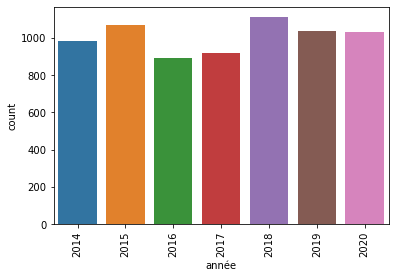

In [330]:
ax = sns.countplot(x='année', data=ue_ouvertes)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Le nombre d'ue ouvertes reste relativement équilibrée.
2018 étant l'année où il y a eu le plus d'enseignements et d'accompagnement
2016 étant l'année avec le moins d'enseignements et d'accompagnement

### * Nombre de crédits ECTS des unités d'enseignement

<AxesSubplot:xlabel='unité_ects', ylabel='count'>

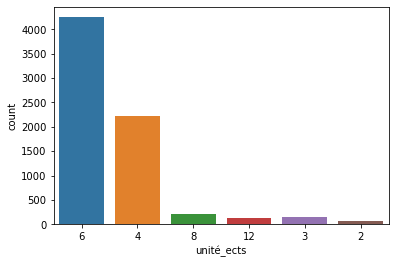

In [300]:
sns.countplot(x='unité_ects', data=ue_ouvertes)

Il y a une majorité d'unité d'enseignement à 6 ECTS et de 4 ECTS.
Cela répond à notre hypothèse : 50% des unités d'enseignements (ue) sont au-delà de 6 ECTS et par conséquent supérieure ou égale à 45 heures par semestre.

### * Nombre d'inscriptions des unités d'enseignement

<AxesSubplot:>

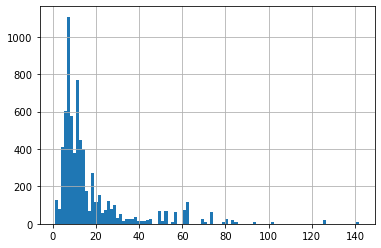

In [107]:
df_cnam['nb-inscription'].hist(bins=100)

Il y a beaucoup d'outliers au delà de 80 inscrits par ue.
Dans la plupart des cas, le nombre d'inscription par ue varie entre 4 et 15 inscriptions. En revanche, nous voyons un mode sur 8 ou 9 inscrits.

Notre hypothèse est vrai, beaucoup d'outliers à droite.
- La moyenne du nombre total d'auditeurs inscrits sur une ue est égale à 17 inscriptions. La médiane étant bien inférieure (11 inscriptions par ue), nous supposons que nous avons des données aberrantes hautes. (fortes inscriptions sur certaines ue).

### * Nombre d'unités d'enseignements

<AxesSubplot:xlabel='code', ylabel='count'>

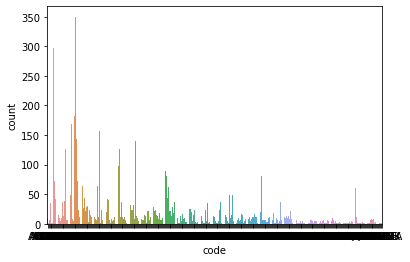

In [297]:
sns.countplot(x='code', data=ue_ouvertes)

Il y a environ 7 unités d'enseignement très fréquentes sur toutes les années.

### Voir les domaines de formation qui prédominent

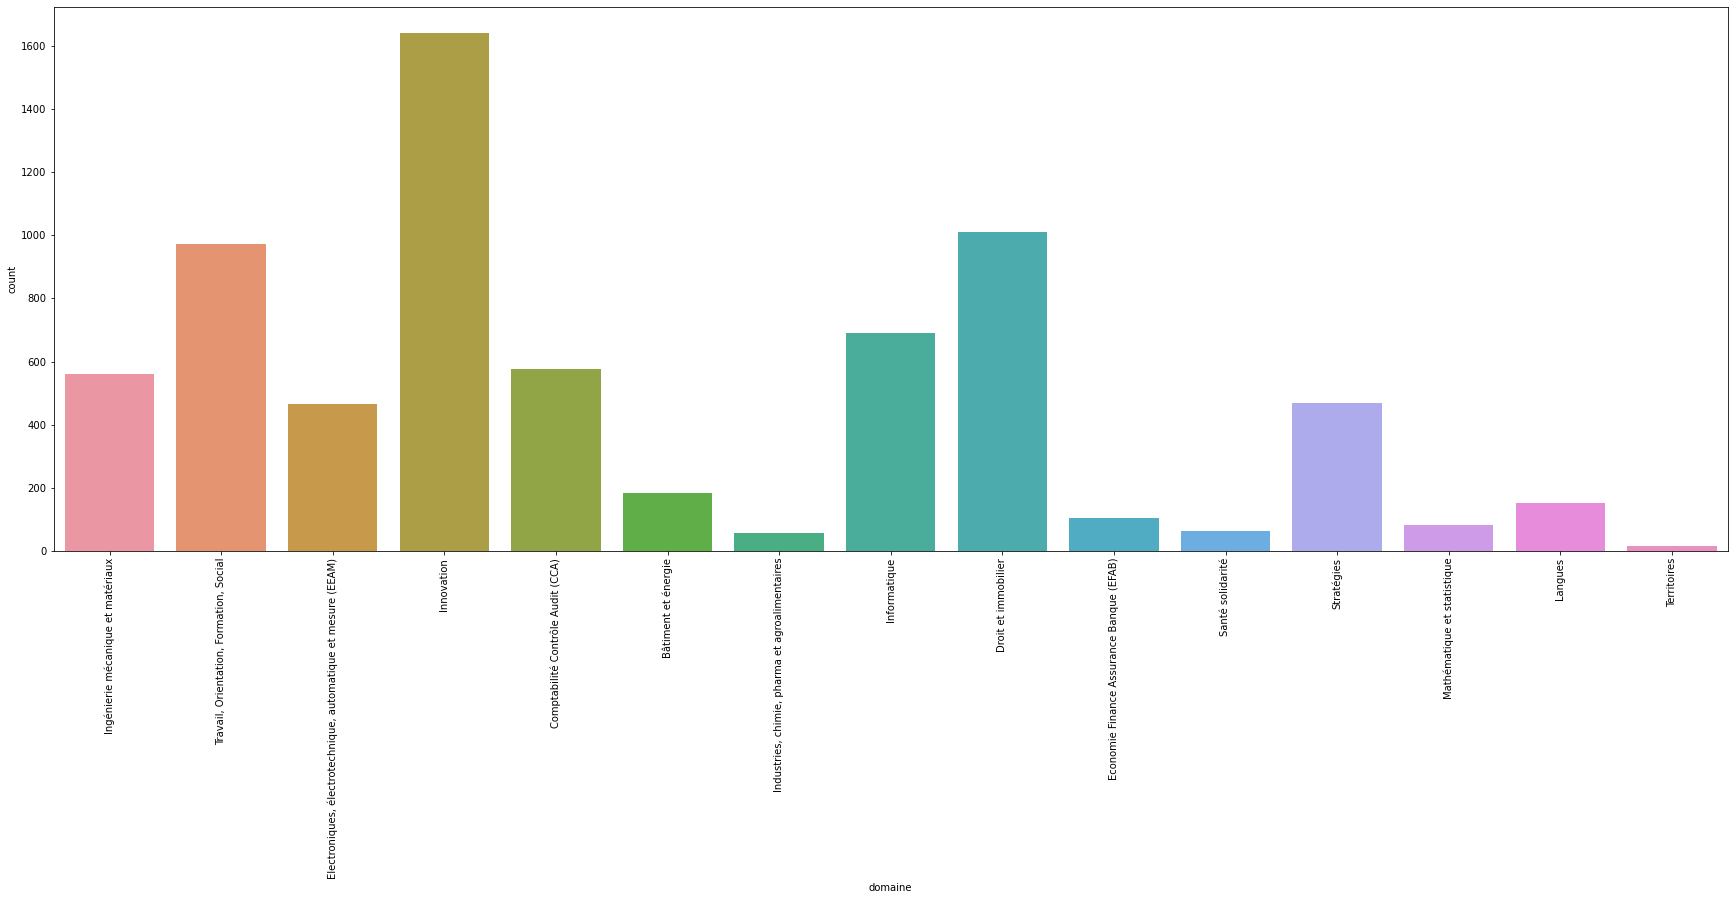

In [17]:
fig=plt.figure(figsize=(30,10))
ax = sns.countplot(x='domaine', data=df_cnam)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Sur l'ensemble de la période 2014-2020, les domaines de formation prédominants sont l'innovation, le droit, l'informatique et le Travail.

-----> Sur les années suivantes :

In [18]:
df_cnam.columns

Index(['année', 'code', 'ue-libellé', 'domaine', 'unité_ects', 'ue-type-code',
       'ue-type', 'nb-inscription', 'enseignant_code', 'centre', 'centre_code',
       'enseignant_nom', 'enseignant_prenom', 'competences', 'volume-horaire',
       'co', 'ct', 'pj', 'st', 'tp'],
      dtype='object')

## Analyse multivariée

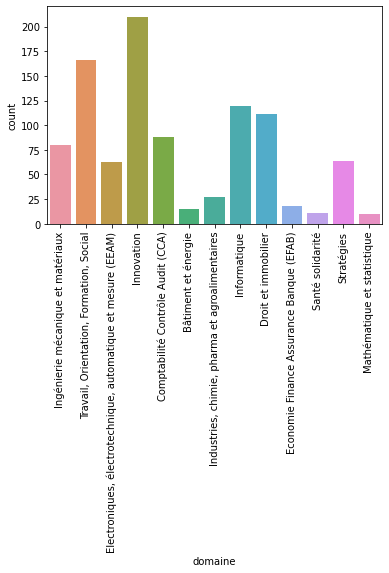

In [20]:
df_2014 = df_cnam.query('année == 2014')
ax = sns.countplot(x='domaine', data=df_2014)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

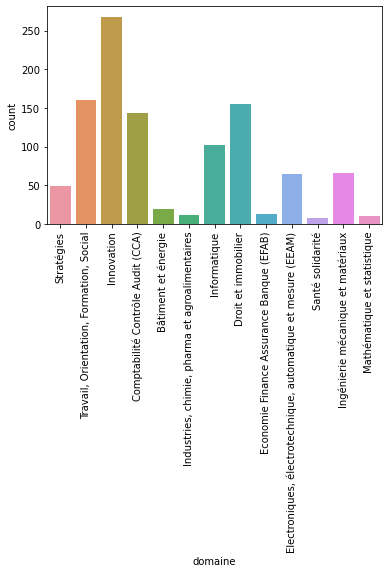

In [21]:
df_2015 = df_cnam.query('année == 2015')
ax = sns.countplot(x='domaine', data=df_2015)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

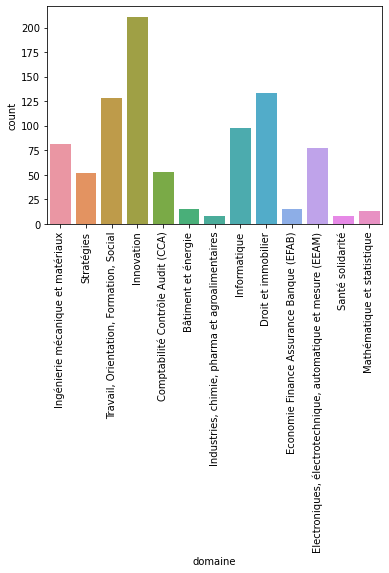

In [22]:
df_2016 = df_cnam.query('année == 2016')
ax = sns.countplot(x='domaine', data=df_2016)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

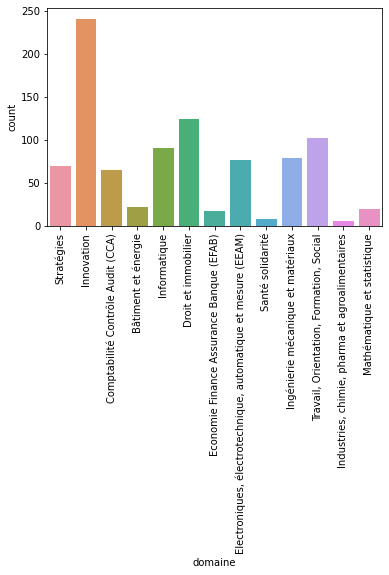

In [23]:
df_2017 = df_cnam.query('année == 2017')
ax = sns.countplot(x='domaine', data=df_2017)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

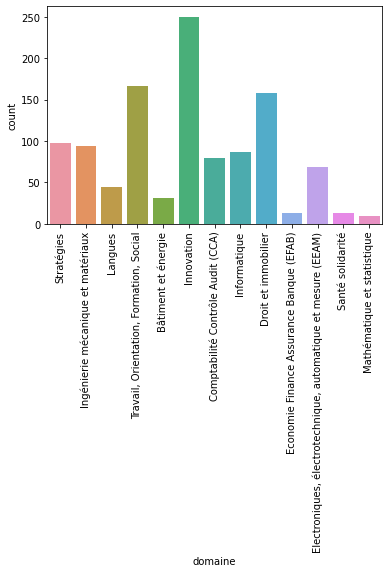

In [24]:
df_2018 = df_cnam.query('année == 2018')
ax = sns.countplot(x='domaine', data=df_2018)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

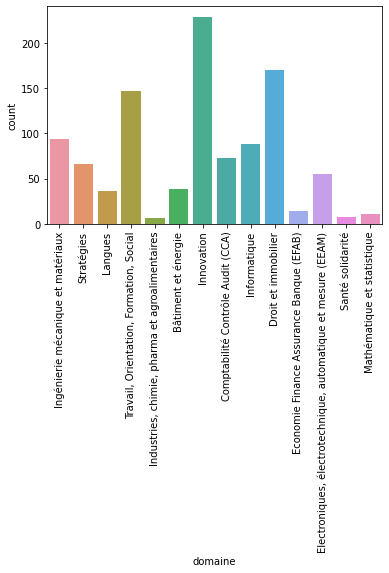

In [25]:
df_2019 = df_cnam.query('année == 2019')
ax = sns.countplot(x='domaine', data=df_2019)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

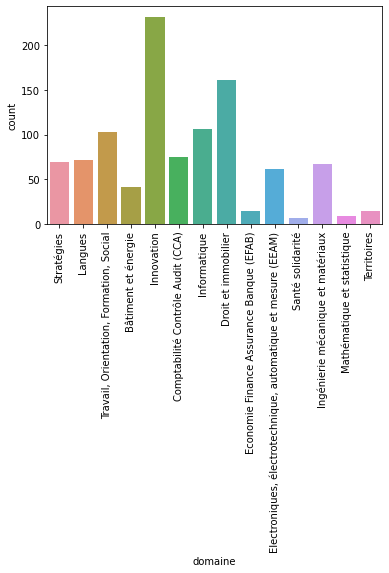

In [26]:
df_2020 = df_cnam.query('année == 2020')
ax = sns.countplot(x='domaine', data=df_2020)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#### Quelles sont les unités d'enseignement les plus fréquentes dans le domaine innovation ?

In [39]:
df_domaine = df_cnam[df_cnam['domaine'] == 'Innovation'].loc[:,'code'].value_counts().head(3)
df_domaine

CCE105    297
FPG104    230
FPG001    162
Name: code, dtype: int64

L'innovation comprend les unités d'enseignement sur le thème de la communication, les ressources humaines, le management

#### Quelles sont les unités d'enseignement les plus fréquentes dans le domaine Travail, Orientation, Formation, Social ?

In [40]:
df_domaine = df_cnam[df_cnam['domaine'] == 'Travail, Orientation, Formation, Social'].loc[:,'code'].value_counts().head(3)
df_domaine

PST003    104
PST004     90
PST002     84
Name: code, dtype: int64

Le Travail, Orientation, Formation, Social comprend notamment tous les enseignements en psychologie.

#### Quelles sont les unités d'enseignement les plus fréquentes dans le domaine Droit - Immobilier ?

In [41]:
df_domaine = df_cnam[df_cnam['domaine'] == 'Droit et immobilier'].loc[:,'code'].value_counts().head(3)
df_domaine

DRS101    350
DRS003    182
DRA103    169
Name: code, dtype: int64

Le Droit et immobilier comprend toutes les unités d'enseignement liées au droit. 

#### Quels sont les unités d'enseignement les plus fréquentes sur l'ensemble de la période 2014-2020 ?

In [13]:
df = df_cnam.groupby(['code'])['année'].count()
df.sort_values(ascending=False).head(3)

code
DRS101    350
CCE105    297
FPG104    230
Name: année, dtype: int64

Le top 3 des unités d'enseignements sur toute la période sont :
DRS101 = Droit du travail : relations individuelles
CCE105 = Pratiques écrites et orales de la communication professionnelle
FPG104 = Gestion de la paie

#### Nombre d'inscription par année

Attention, ce nombre est à nuancer car les unités sont démultipliées par enseignant et par semestre, la proportion du nombre d'inscription est bon mais le total est erroné.

In [9]:
df_cnam.groupby(["année"])["nb-inscription"].sum()

année
2014    14593
2015    15948
2016    15335
2017    17096
2018    19470
2019    18774
2020    20964
Name: nb-inscription, dtype: int64

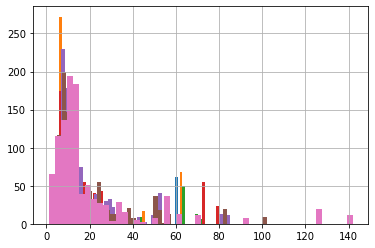

In [47]:
graph = df_cnam.groupby(["année"])["nb-inscription"].hist(bins=50)

La distribution du nombre des inscriptions par année est très biaisée à droite. 
Il y a une loi de Pareto sur le nombre d'inscriptions par unité, et ce sur chaque année

Une majorité du nombre d'auditeurs inscrits varient entre 2 et 20 inscriptions par ue qu'importe l'année

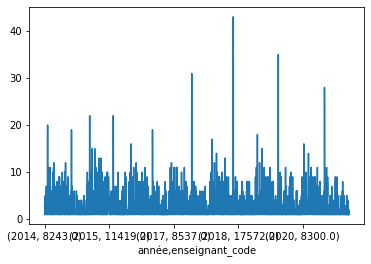

In [45]:
graph = df_cnam.groupby(["année","enseignant_code"])["nb-inscription"].count().plot()

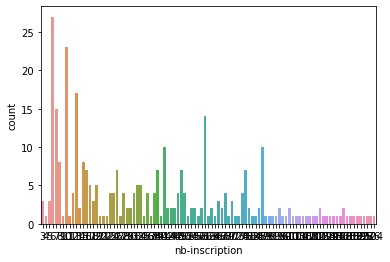

In [73]:
ax = sns.countplot(x=df_cnam[df_cnam["année"] == 2014].groupby(["enseignant_code"])["nb-inscription"].sum())

En 2014, 6 enseignants ont plus de 10 inscrits. Un seul dépasse les 25 inscriptions

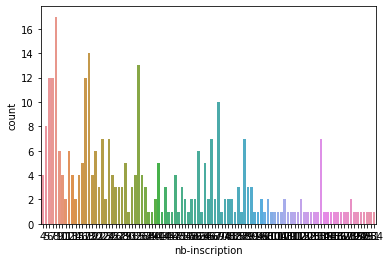

In [75]:
ax = sns.countplot(x=df_cnam[df_cnam["année"] == 2015].groupby(["enseignant_code"])["nb-inscription"].sum())

En 2015, 5 enseignants ont plus de 10 inscrits. Distribution des inscriptions plus diversifiée.

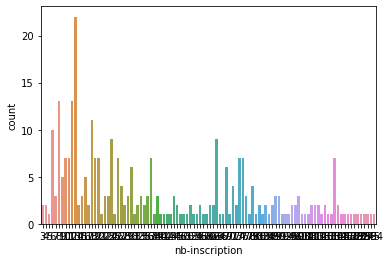

In [76]:
ax = sns.countplot(x=df_cnam[df_cnam["année"] == 2016].groupby(["enseignant_code"])["nb-inscription"].sum())

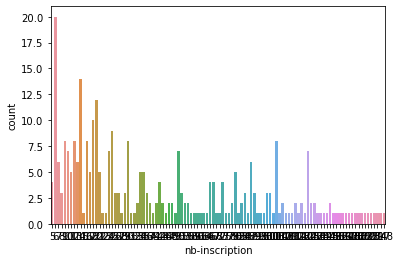

In [86]:
ax = sns.countplot(x=df_cnam[df_cnam["année"] == 2017].groupby(["enseignant_code"])["nb-inscription"].sum())

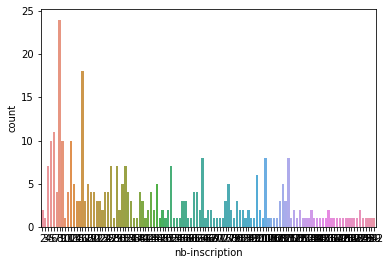

In [87]:
ax = sns.countplot(x=df_cnam[df_cnam["année"] == 2018].groupby(["enseignant_code"])["nb-inscription"].sum())

### * Centres d'enseignement

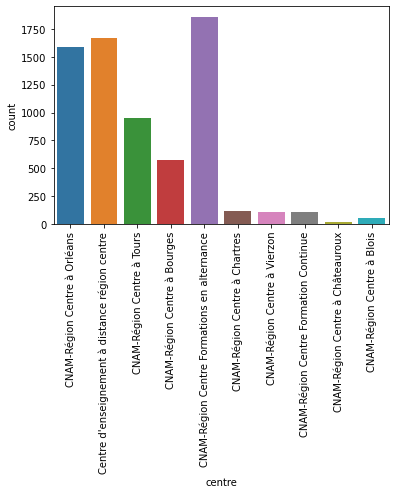

In [50]:
#Toutes années confondues
ax = sns.countplot(x='centre', data=df_cnam)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Les 3 plus grands centres sont :

- Pour la formation hors temps de travail, le centre d'Orléans
- La formation à distance
- La formation en alternance

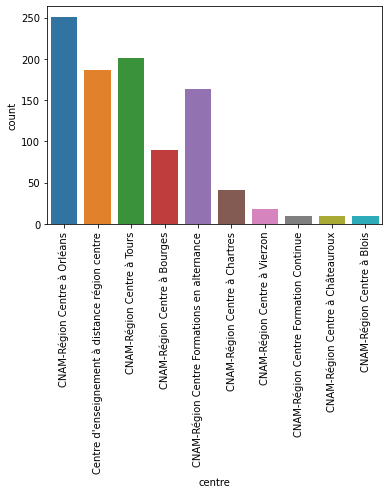

In [52]:
#Uniquement en 2014 :

df_2014 = df_cnam.query('année == 2014')
ax = sns.countplot(x='centre', data=df_2014)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

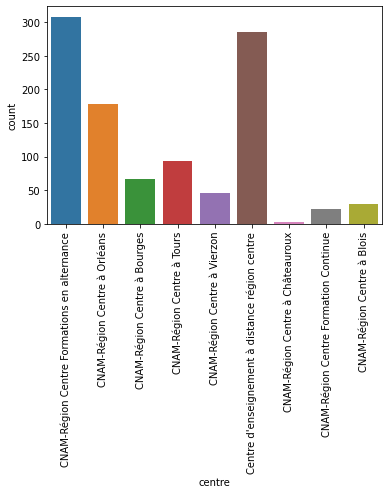

In [53]:
#Uniquement en 2020 :

df_2020 = df_cnam.query('année == 2020')
ax = sns.countplot(x='centre', data=df_2020)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Les formations en alternance ont doublé !
Mais surtout les formations en présentiel, autrefois Tours et Orléans qui prédominaient font clairement place à la formation à distance.

In [45]:
#formations en alternance 2014
df_centre = df_cnam.query('centre_code == 411 & année == 2014')
df_centre.code.value_counts().head(3)

#Management, droit et communication

EME104    13
DRA103    13
CCE105    11
Name: code, dtype: int64

In [48]:
#formations en alternance 2020
df_centre = df_cnam.query('centre_code == 411 & année == 2020')
df_centre.code.value_counts().head(3)

#Management, droit et communication

DRS101    14
EME104    13
DRA103    13
Name: code, dtype: int64

In [46]:
#centre formations à distance 2014
df_centre = df_cnam.query('centre_code == 292 & année == 2014')
df_centre.code.value_counts().head(3)

# Comptabilité

CFA002    9
CCG101    8
CFA003    7
Name: code, dtype: int64

In [49]:
#centre formations à distance 2020
df_centre = df_cnam.query('centre_code == 292 & année == 2020')
df_centre.code.value_counts().head(3)

# Comptabilité

DRA103    13
EME104    13
CFA116     9
Name: code, dtype: int64

In [47]:
#centre d'enseignement sur Orléans 2014
df_centre = df_cnam.query('centre_code == 231 & année == 2014')
df_centre.code.value_counts().head(3)

# Droit et comptabilité

DRS101    14
DRA103    13
CFA106    13
Name: code, dtype: int64

Il semble que sur la période : Seules les modalités ont changé mais pas les domaines de formation.

### * Le volume horaire

<AxesSubplot:xlabel='volume-horaire', ylabel='count'>

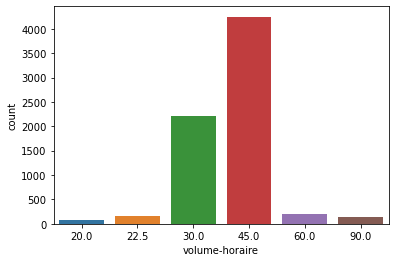

In [339]:
sns.countplot(x='volume-horaire', data=df_cnam)

<AxesSubplot:xlabel='volume-horaire', ylabel='count'>

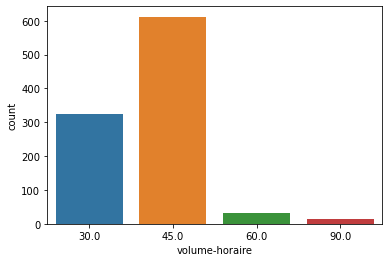

In [54]:
sns.countplot(x='volume-horaire', data=df_2014)

<AxesSubplot:xlabel='volume-horaire', ylabel='count'>

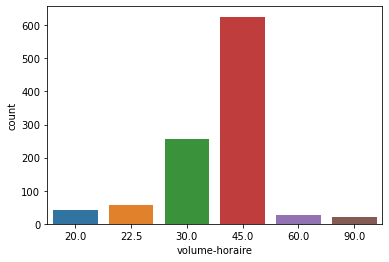

In [55]:
sns.countplot(x='volume-horaire', data=df_2020)

Entre 2014 et 2020, il semble que le volume horaire des unités d'enseignement se soit diversifié, cependant les unités de 45H restent majoritaires.

### * Les types de cours

<AxesSubplot:xlabel='ue-type-code', ylabel='count'>

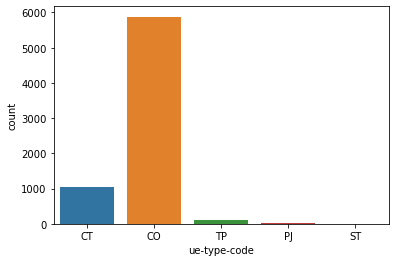

In [302]:
sns.countplot(x='ue-type-code', data=df_cnam)

* 1er groupe : enseignement - Unités d'enseignement

'co' = cours
'ct' = cours et travaux pratiques
'tp' = travaux pratiques

* 2ème groupe : Unités d'accompagnement

'pj' = suivi de projet
'st' = suivi de stage
'tp' = travaux pratiques

In [70]:
df_type_ue = df_cnam.query('co == 1 | ct == 1 | tp == 1')
len(df_type_ue)

7027

In [71]:
df_type_ua = df_cnam.query('pj == 1 | st == 1 | tp == 1')
len(df_type_ua)

114

In [69]:
# proportion des unités d'accompagnement sur la totalité des unités proposées est égale à 1 % sur la période 2014-2020
114 / len(df_cnam)

0.016190881976991905

In [72]:
7027/len(df_cnam)

0.998011646073001

### * Les enseignants

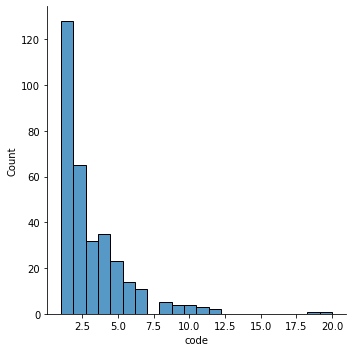

In [87]:
ax = sns.displot(x=df_cnam[df_cnam["année"] == 2014].groupby(["enseignant_code"])["code"].count())

Les enseignants ont pour la majorité d'entre-eux qu'une seule unité d'enseignement par année.

In [11]:
df_enseignant = df_cnam.groupby(["enseignant_code"]).code.count()
serie = df_enseignant.sort_values(ascending=False)
serie

enseignant_code
13479    197
8426     121
8635      89
8548      82
9734      74
        ... 
11832      1
37489      1
37989      1
38042      1
37703      1
Name: code, Length: 500, dtype: int64

In [12]:
len(df_enseignant)

500

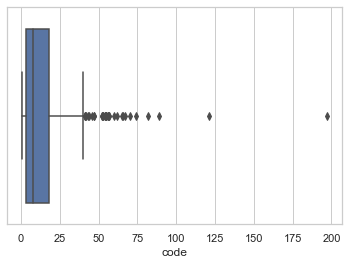

In [139]:
#Avant que les outliers soient supprimés

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_enseignant)

In [126]:
serie_moinsde35 = serie[serie < 35]

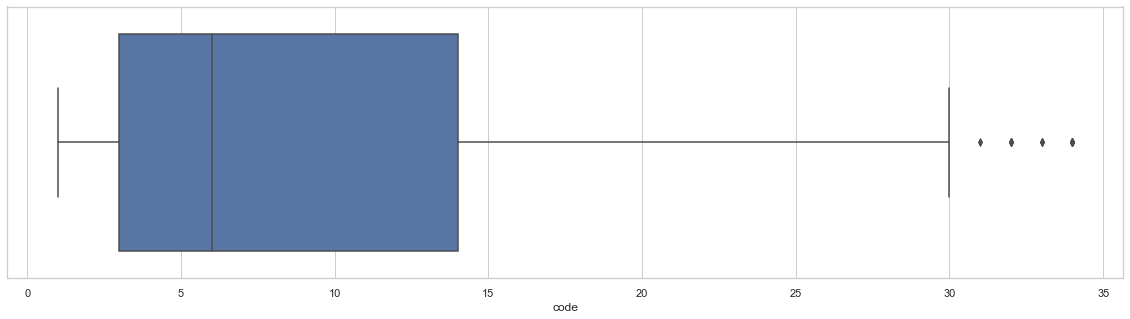

In [154]:
#Après que les outliers soient supprimés
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=serie_moinsde35)

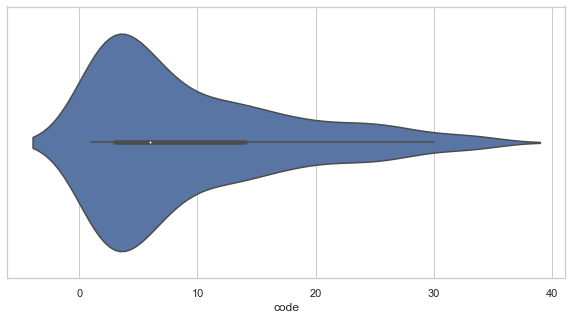

In [156]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=serie_moinsde35)

Au fil des années, il y a des enseignants avec beaucoup d'ancienneté qui ont cumulé les unités d'enseignement.
Sur la période 2014-2020, le nombre d'unités d'enseignement est très variable car la boîte à moustache est large.
50% des enseignants ont moins de 6 unités d'enseignement sur la période et 50% des enseignants ont plus.
Le violinplot nous montre qu'il y a une forte densité d'enseignant qui ont 4-5 enseignements sur la période 2014-2020.

#### Nombre de crédit d'une unité par rapport au nombre d'inscriptions

<AxesSubplot:xlabel='unité_ects', ylabel='nb-inscription'>

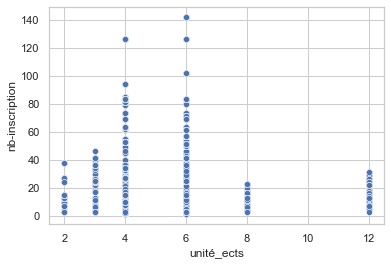

In [152]:
sns.scatterplot(data=df_cnam, x="unité_ects", y="nb-inscription")

Il y a plus d'inscriptions sur les unités de 4 et de 6 crédits sur la période de 2014-2020.

## Création de line plot

<AxesSubplot:xlabel='année', ylabel='nb-inscription'>

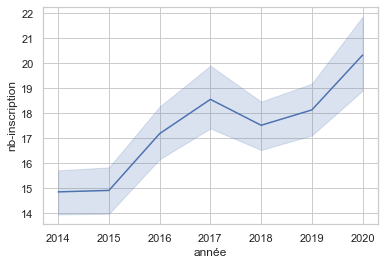

In [149]:
sns.lineplot(data=df_cnam, x="année", y="nb-inscription")

Le nombre d'inscription est en hausse

In [150]:
df_cnam.dtypes

année                  int64
code                  object
ue-libellé            object
domaine               object
unité_ects             int64
ue-type-code          object
ue-type               object
nb-inscription         int64
enseignant_code        int64
centre                object
centre_code            int64
enseignant_nom        object
enseignant_prenom     object
competences           object
volume-horaire       float64
co                   float64
ct                   float64
pj                   float64
st                   float64
tp                   float64
dtype: object

## Création d'un pairplot

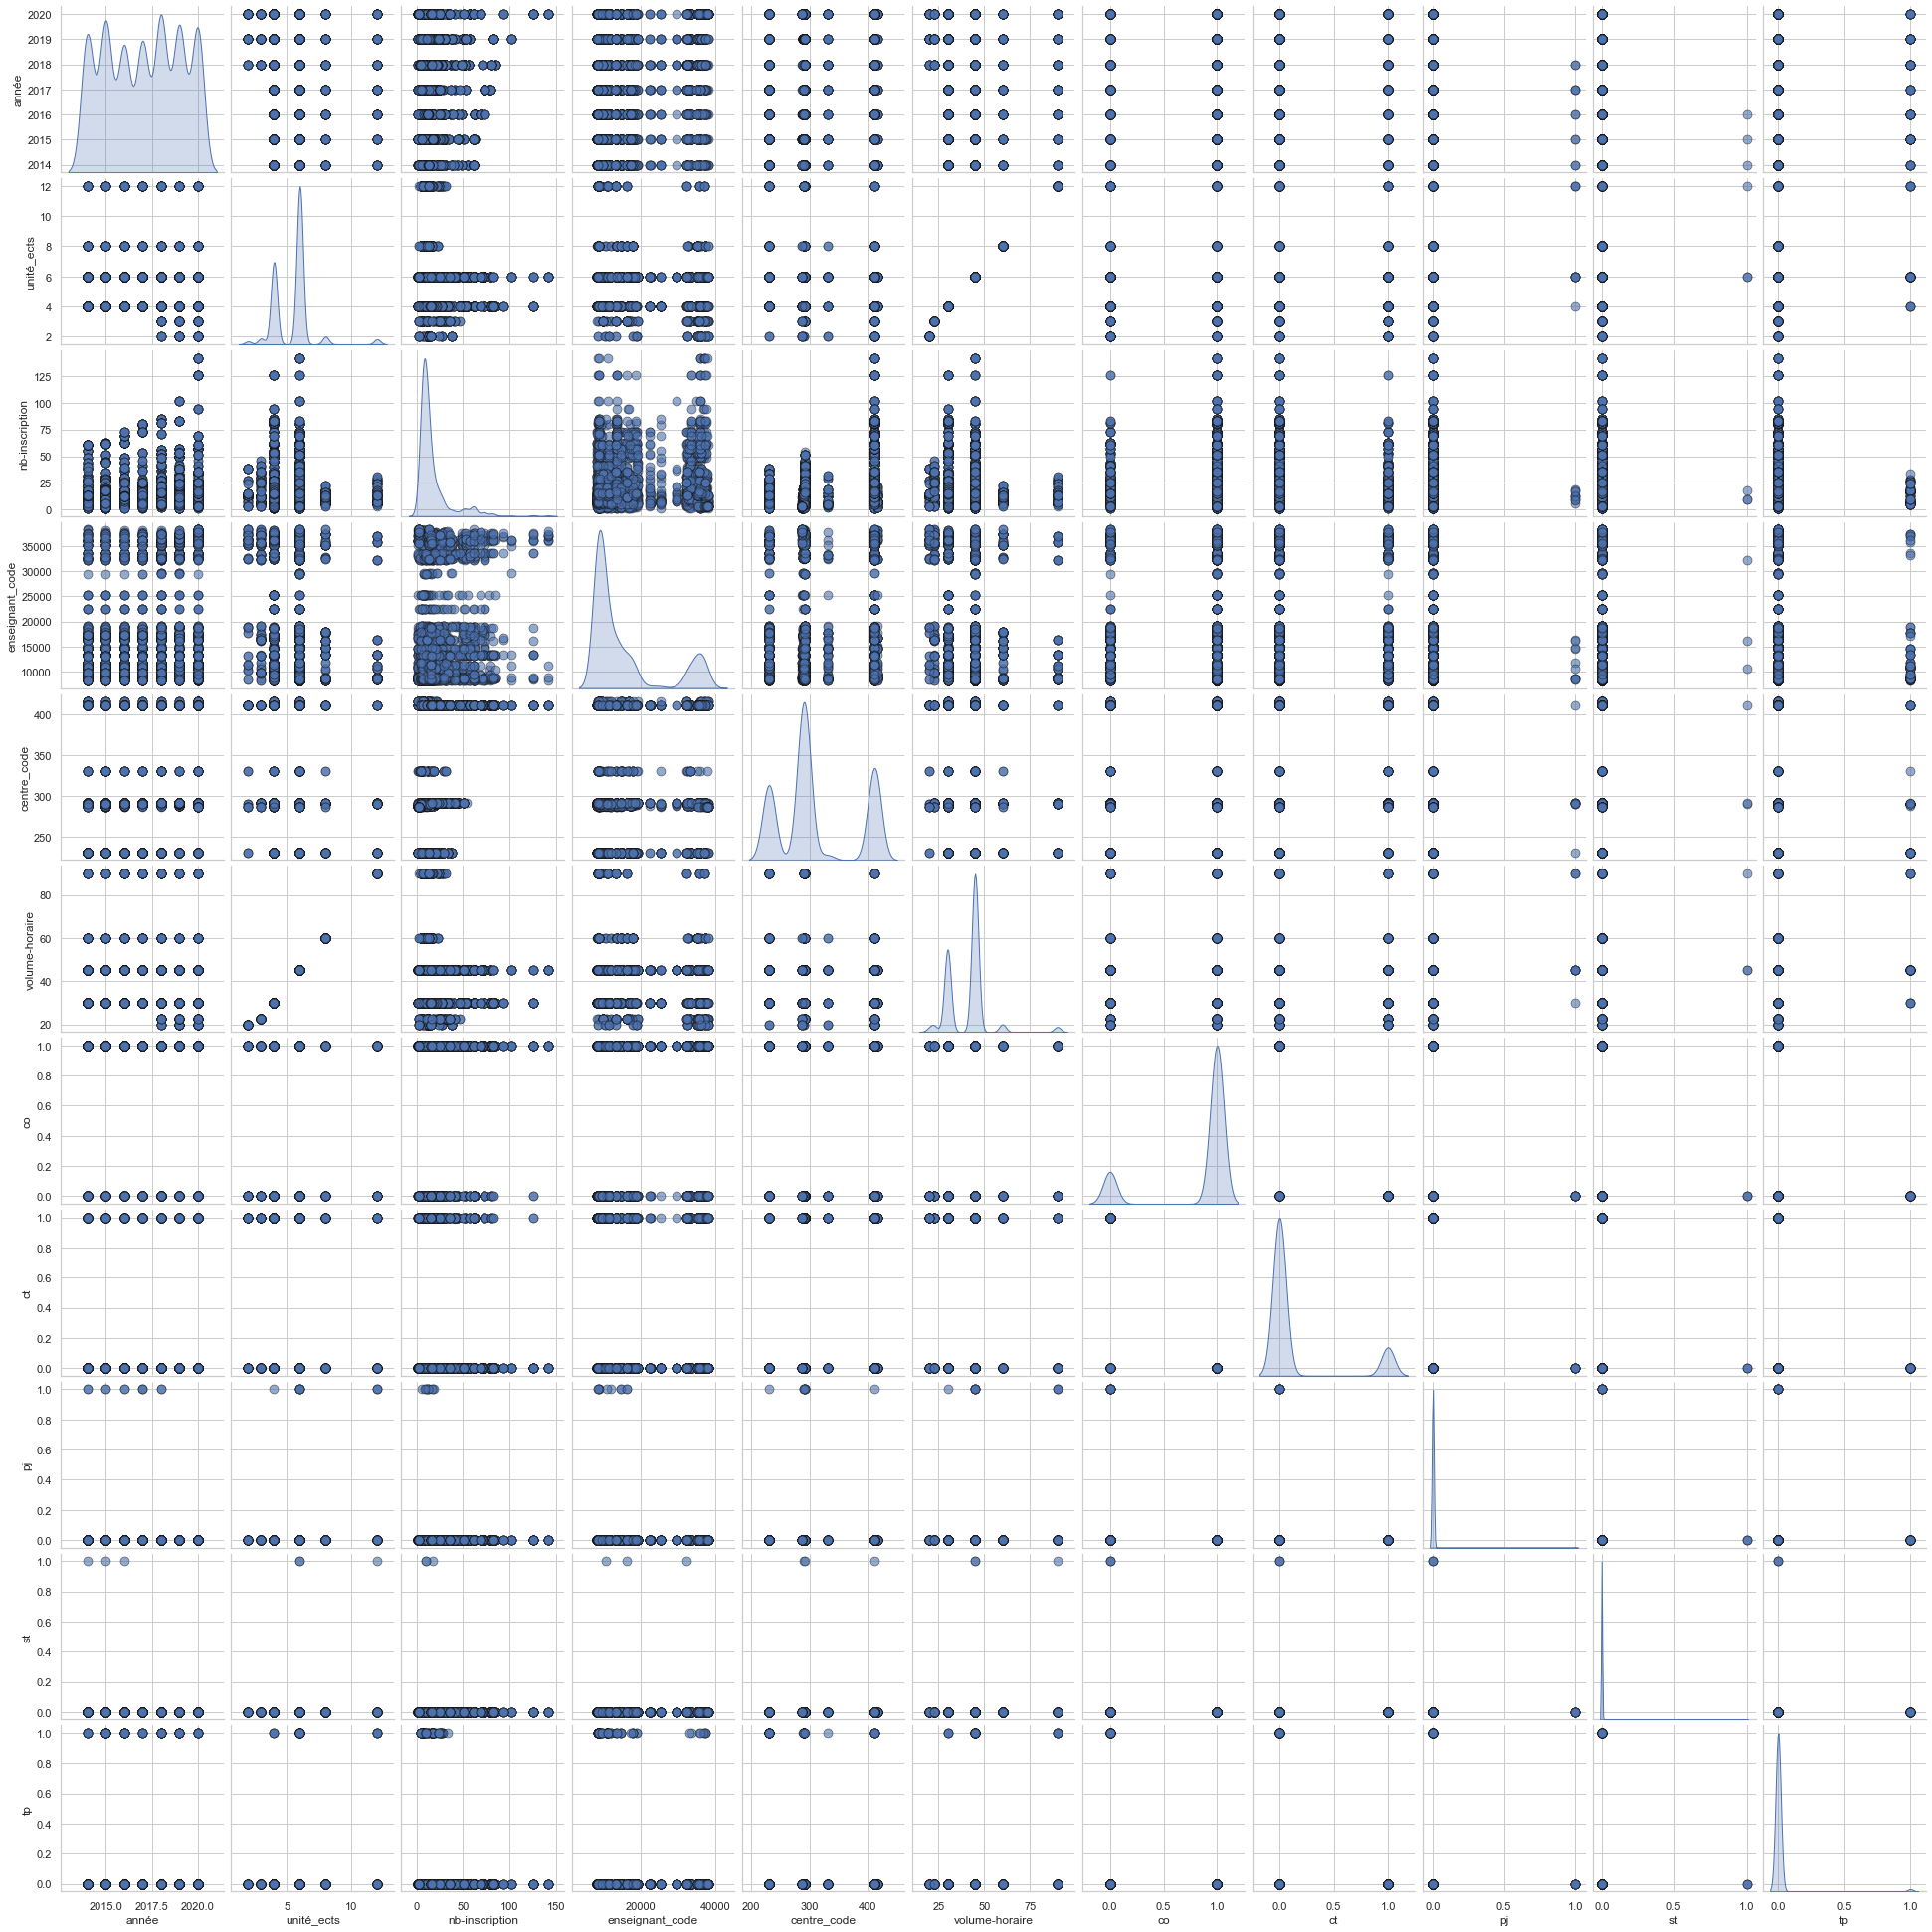

In [140]:
sns.pairplot(df_cnam, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

Corrélation linéaire positive parfaite entre le nombre d'ects d'une unité d'enseignement et le volume horaire.

L’ECTS peut combiner différents modes d’apprentissage, tels que la formation universitaire et par le travail, au sein d’un même programme d’études ou dans le cadre de l’apprentissage tout au long de la vie.

Les crédits ECTS représentent un apprentissage fondé sur des acquis d’apprentissage clairement définis ainsi que sur la charge de travail qui leur est associée. Et donc, plus le nombre de crédits est grand, plus il est logique que l'on demande un volume horaire plus conséquent.

Au Cnam, le nombre d'ECTS détermine le volume horaire de l'unité.

## Création d'un heatmap de corrélation

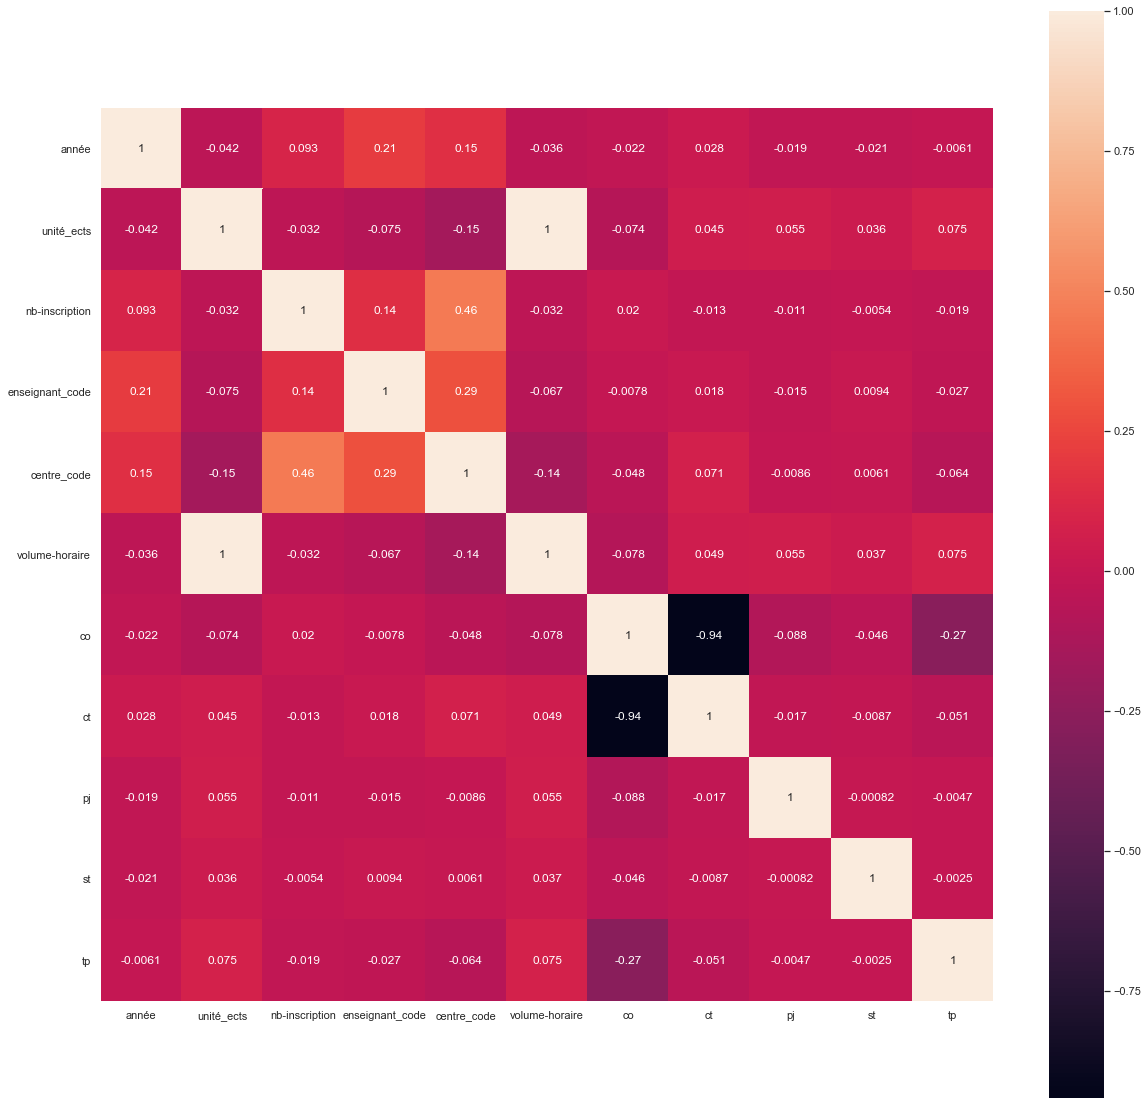

In [142]:
#Voir l'ensemble des taux de corrélation

plt.figure(figsize=(20, 20))
p = sns.heatmap(df_cnam.corr(), annot=True, square=True)

On voit également une corrélation positive entre le nombre d'inscription et le centre. Nous avions vu effectivement qu'en fonction des centres (lieux ou à distance ou en alternance) ayant une offre de formation plus importante, il n'est pas étonnant que cela influe positivement sur le nombre d'inscriptions.